In [ ]:
#Q:2.1

In [47]:
import cv2
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
%run myfunctions

In [49]:
gray = []
img = []
for imgp in glob.glob('images/*.*'):
    gray.append(cv2.imread(imgp,0))
    img.append(cv2.cvtColor(cv2.imread(imgp,1),cv2.COLOR_BGR2RGB))

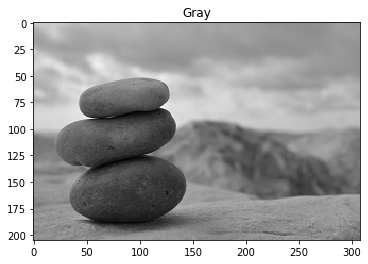

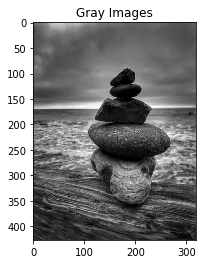

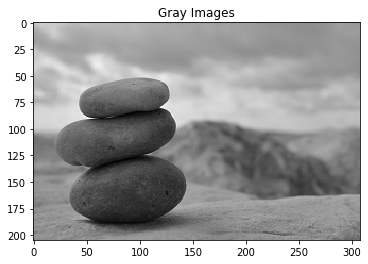

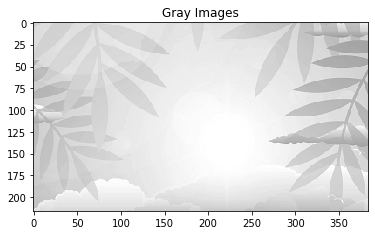

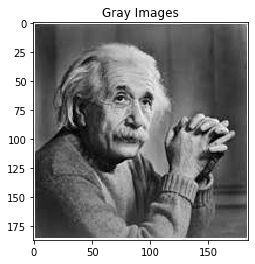

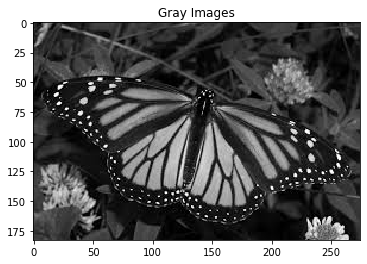

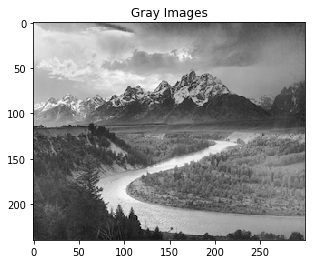

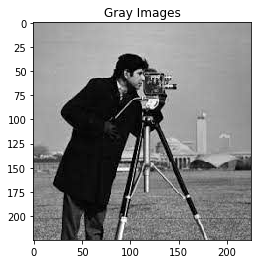

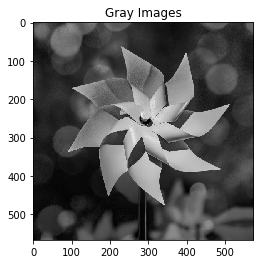

In [50]:
#showing an image
displayImage(gray[1],"Gray")

for i in range(8):
    displayImage(gray[i],"Gray Images")
    

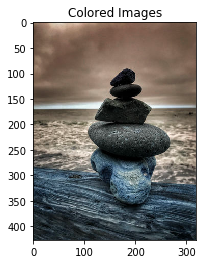

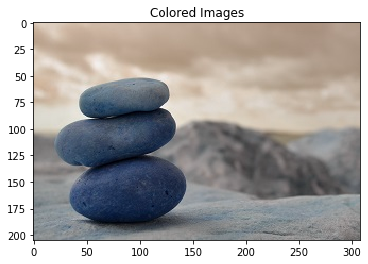

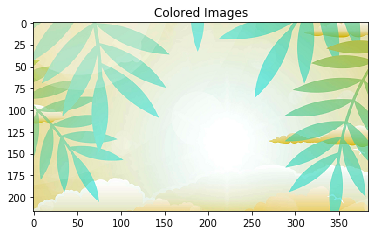

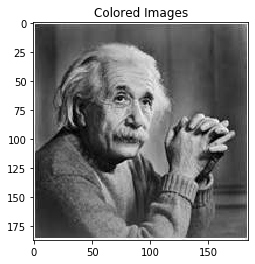

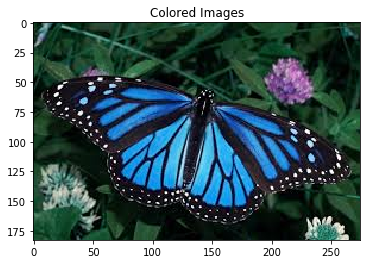

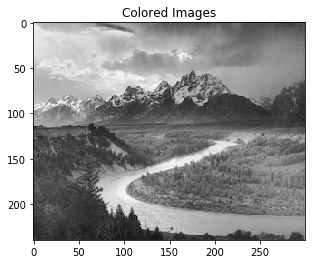

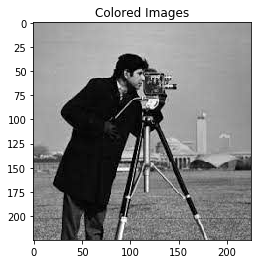

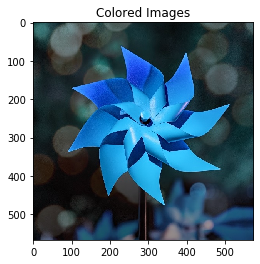

In [51]:
for i in range(8):
    displayImage(img[i],"Colored Images")

In [52]:
#Q:2.2

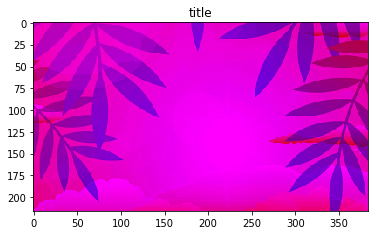

In [53]:
displayImage(channel(img,1),"title")

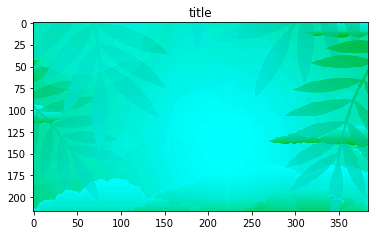

In [54]:
displayImage(channel(img,2),"title")

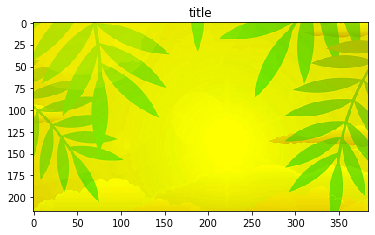

In [55]:
displayImage(channel(img,0),"title")

In [56]:
def myConvolve2d(img, kernel):
   
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(img)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((img.shape[0] + 2, img.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = img
    
    # Loop over every pixel of the image and implement convolution operation (element wise multiplication and summation). 
    # You can use two loops. The result is stored in the variable output.
    
    for x in range(img.shape[0]):     # Loop over every pixel of the image
        for y in range(img.shape[1]):
            # element-wise multiplication and summation 
            output[x,y]=(kernel*image_padded[x:x+3,y:y+3]).sum()
        
    
    return output

In [57]:
from skimage import io

In [58]:
#Q:2.3   

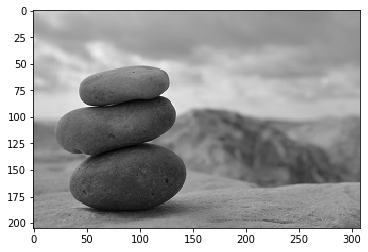

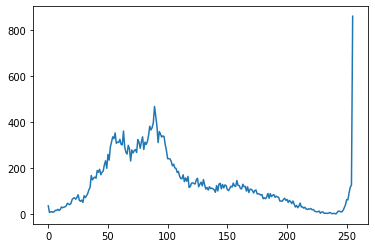

In [81]:
plt.imshow(gray[1],cmap='gray')
plt.show()
#img = cv2.imread('01.jpg',0)
img = cv2.imread("./Images/01.jpg",0)
h = cv2.calcHist([gray[3]],[0],None,[256],[0,256])
plt.plot(h)
plt.show()

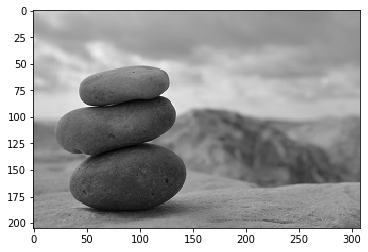

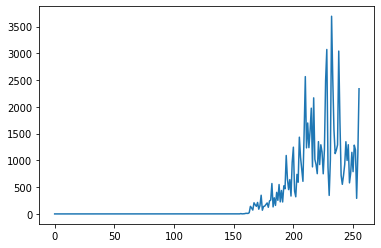

In [82]:
plt.imshow(gray[1],cmap='gray')
plt.show()
#img = cv2.imread('02.jpg',0)
h = cv2.calcHist([gray[2]],[0],None,[256],[0,256])
plt.plot(h)
plt.show()

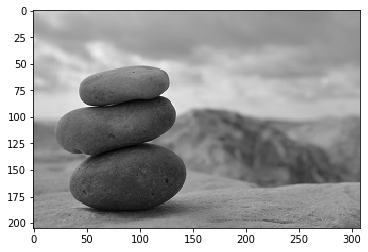

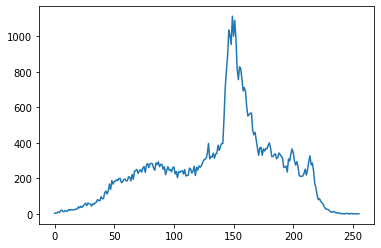

In [77]:
plt.imshow(gray[1],cmap='gray')
plt.show()
#img = cv2.imread('04.jpg',0)
h = cv2.calcHist([gray[1]],[0],None,[256],[0,256])
plt.plot(h)
plt.show()

In [ ]:
#Q: 2.4

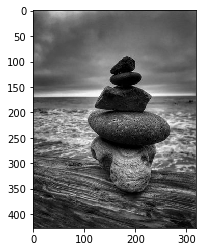

In [68]:
img = io.imread("01.jpg",1) #in skimage 1 is for grayscale 
plt.imshow(img,cmap=plt.cm.gray)

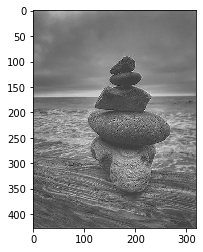

In [70]:
kernel = np.array([[0,-1,0],[-1,5,-1],[1,-1,0]])
#Call the function my_convolve2d
image_sharpen = myConvolve2d(img,kernel)
plt.imshow(image_sharpen,cmap=plt.cm.gray)

In [71]:
#Q:2.5

In [92]:
from skimage import io
from scipy import signal
from skimage import io

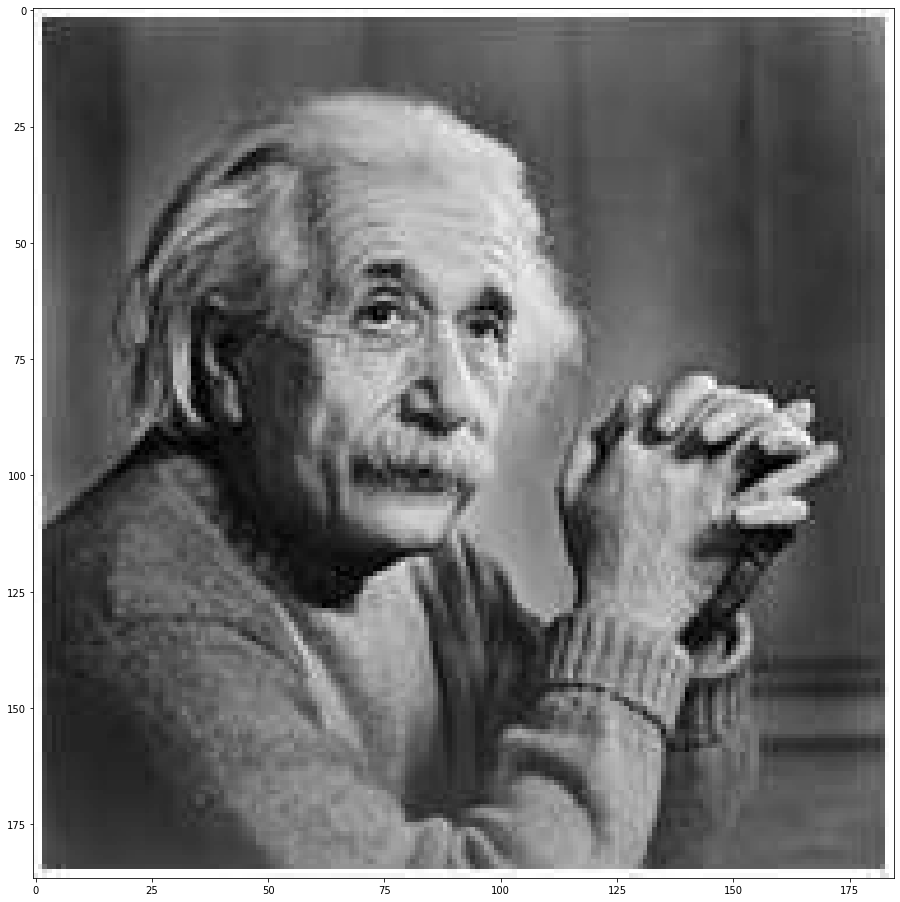

In [93]:
img = io.imread("./images/04.jpg",1) #in skimage 1 is for grayscale 
plt.imshow(img,cmap=plt.cm.gray)

Text(0.5, 1.0, 'Blurred')

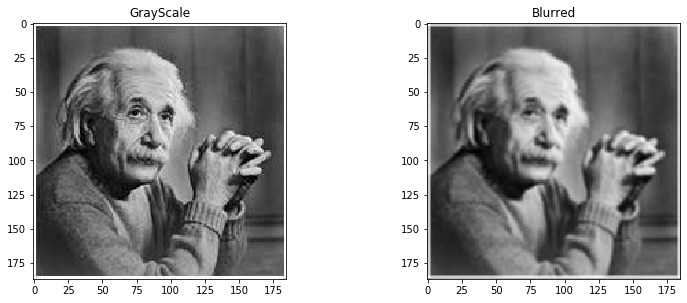

In [94]:
from scipy import signal
img = cv2.imread("./Images/04.jpg",0)

kernel = np.ones((3,3),np.float32)/9 #blur
f = signal.convolve2d(img,kernel, 'same')

plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(3, 3, 2)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("Blurred")

Text(0.5, 1.0, 'Gaussian Filter, sigma=4')

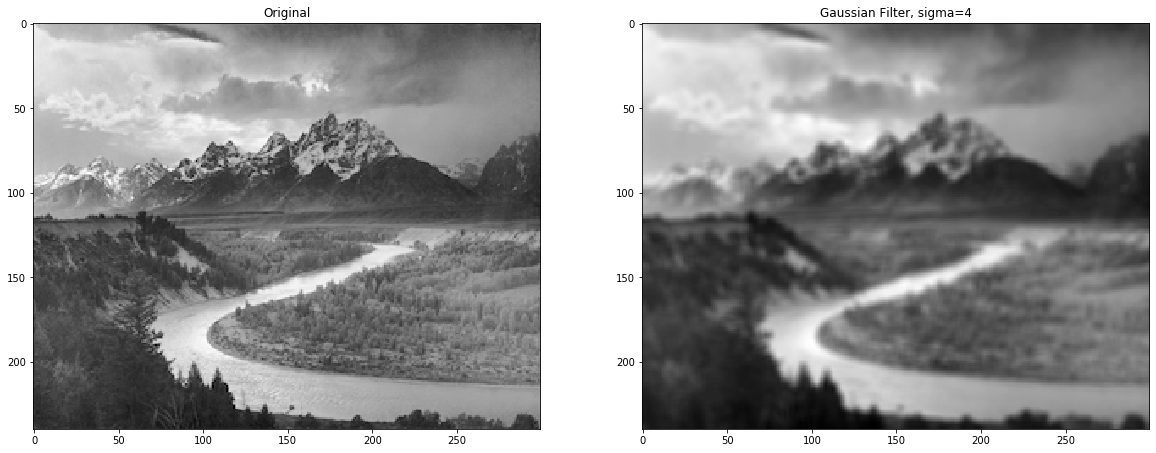

In [100]:
gray[1] = cv2.imread("images/05.jpg",0)
img_gaussianFilter = cv2.GaussianBlur(gray[1], (5,5),sigmaX=4)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(gray[1],cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=4")

Text(0.5, 1.0, 'Gaussian Filter, sigma=4')

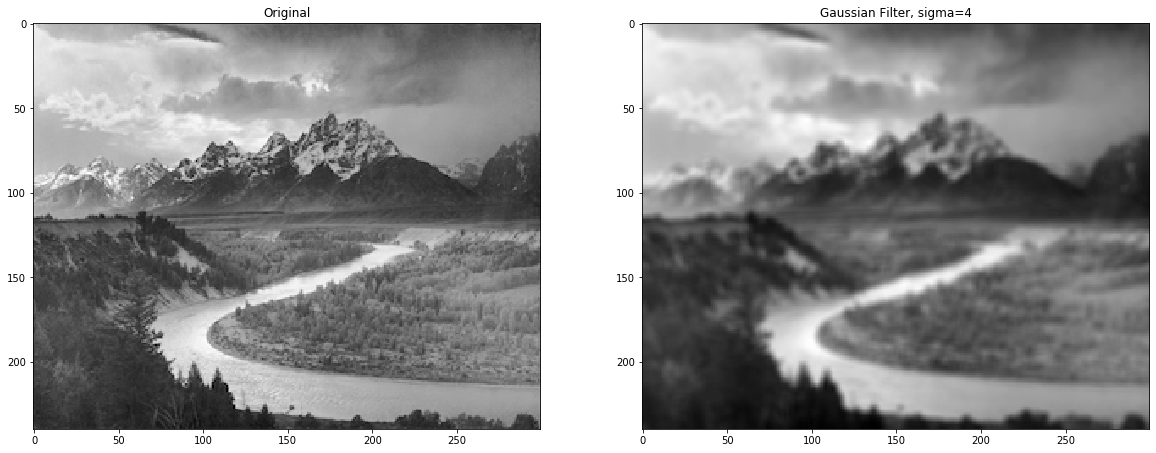

In [101]:
img_gaussianFilter = cv2.GaussianBlur(gray[1], (5,5),sigmaX=3)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(gray[1],cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=4")

Text(0.5, 1.0, 'Gaussian Filter, sigma=4')

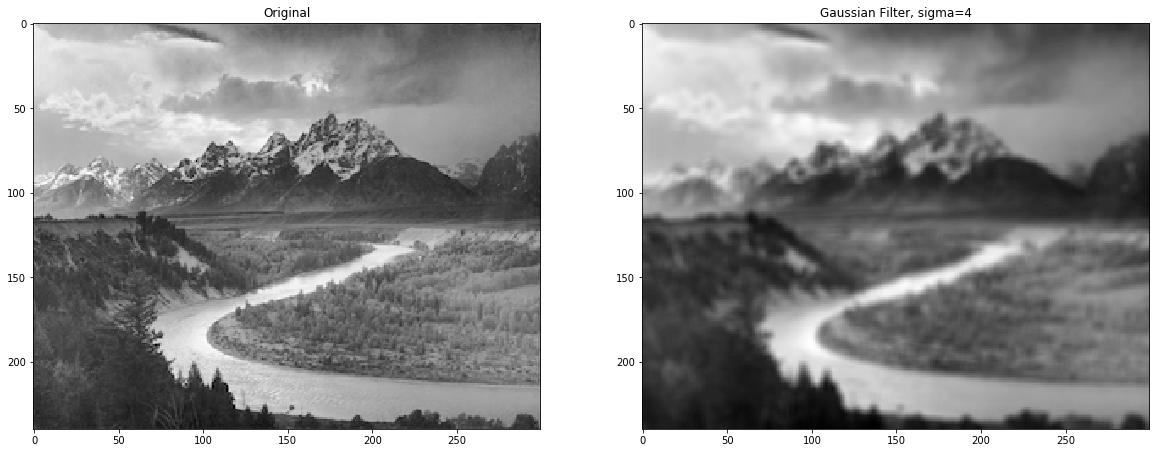

In [85]:
img_gaussianFilter = cv2.GaussianBlur(image_01, (5,5),sigmaX=5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(image_01,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=4")


Text(0.5, 1.0, 'Median Filter')

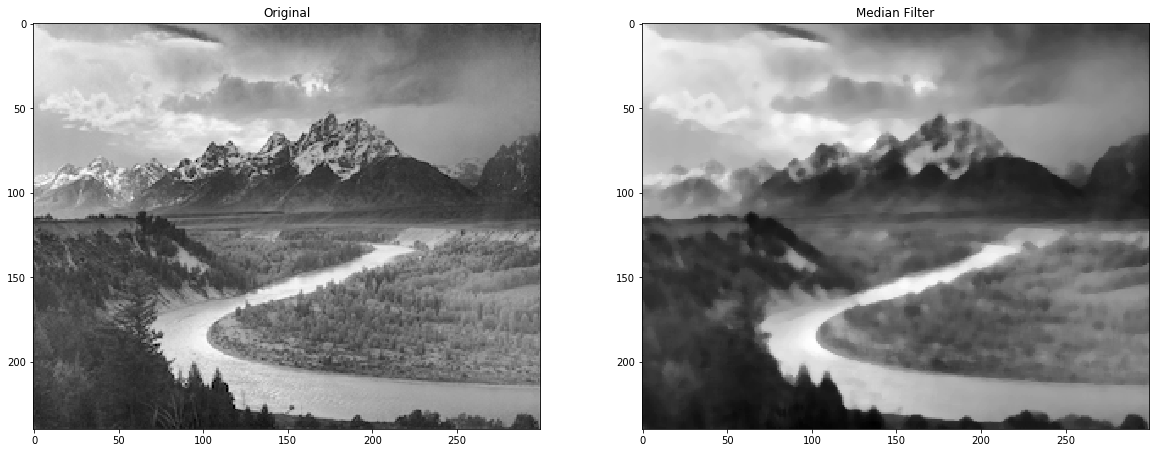

In [86]:
img_med = cv2.medianBlur(image_01,5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(image_01,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_med,cmap=plt.cm.gray)
plt.title("Median Filter")

In [ ]:
#Q: 2.6

In [89]:
# Laplacian kernel 
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
 
# x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
 
# y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

In [90]:
from scipy import signal

def compute_gradients(img,laplacian,sobelX,sobelY):
    img_Laplacian = cv2.Laplacian(img,cv2.CV_64F)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(1, 3, 2).imshow(img_Laplacian,cmap=plt.cm.gray)
    plt.title("Laplacian")

    #Sobel X part
    img_SobelX =  cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(2, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(2, 3, 2)
    plt.imshow(img_SobelX,cmap=plt.cm.gray)
    plt.title("Sobel-X")

    #Sobel Y part
    img_SobelY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(3, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(3, 3, 2)
    plt.imshow(img_SobelY,cmap=plt.cm.gray)
    plt.title("Sobel-Y")

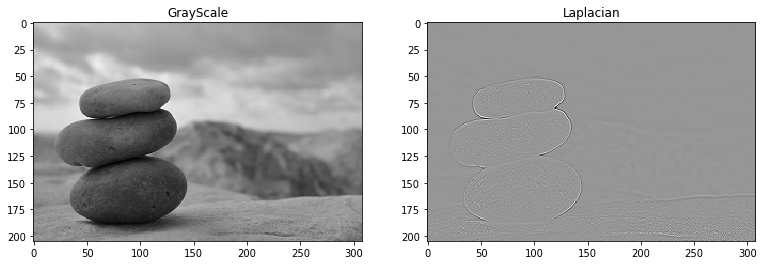

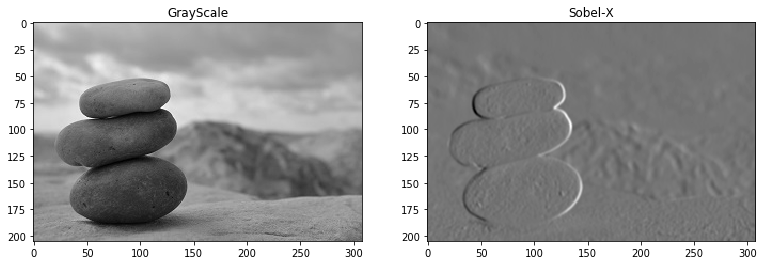

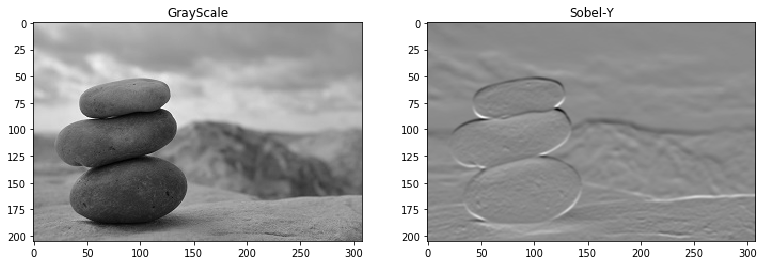

In [91]:
image_01 = cv2.imread("02.jpg",0)
compute_gradients(image_01,laplacian,sobelX,sobelY)

Text(0.5, 1.0, 'Canny edge detector')

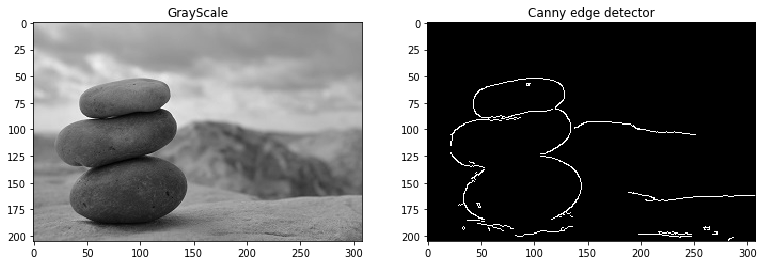

In [106]:
img = cv2.imread("images/02.jpg",0)
edges = cv2.Canny(img, 100, 200)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
plt.title("Canny edge detector")